
1.	Implement and demonstrate the FIND-S algorithm for finding the most specific hypothesis based on a given set of training data samples. Read the training data from a .CSV file.



In [30]:
import csv
a = []
with open('enjoysport.csv', 'r') as csvfile:
    next(csvfile)
    for row in csv.reader(csvfile):
        a.append(row)
    print(a)

print("\nThe total number of training instances are : ",len(a))

num_attribute = len(a[0])-1

print("\nThe initial hypothesis is : ")
hypothesis = ['0']*num_attribute
print(hypothesis)

for i in range(0, len(a)):
    if a[i][num_attribute] == 'yes':
        print ("\nInstance ", i+1, "is", a[i], " and is Positive Instance")
        for j in range(0, num_attribute):
            if hypothesis[j] == '0' or hypothesis[j] == a[i][j]:
                hypothesis[j] = a[i][j]
            else:
                hypothesis[j] = '?'
        print("The hypothesis for the training instance", i+1, " is: " , hypothesis, "\n")

    if a[i][num_attribute] == 'no':
        print ("\nInstance ", i+1, "is", a[i], " and is Negative Instance Hence Ignored")
        print("The hypothesis for the training instance", i+1, " is: " , hypothesis, "\n")

print("\nThe Maximally specific hypothesis for the training instance is ", hypothesis)

[['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes'], ['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes'], ['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no'], ['sunny', 'warm', 'high', 'strong', 'cool', 'change', 'yes']]

The total number of training instances are :  4

The initial hypothesis is : 
['0', '0', '0', '0', '0', '0']

Instance  1 is ['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes']  and is Positive Instance
The hypothesis for the training instance 1  is:  ['sunny', 'warm', 'normal', 'strong', 'warm', 'same'] 


Instance  2 is ['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes']  and is Positive Instance
The hypothesis for the training instance 2  is:  ['sunny', 'warm', '?', 'strong', 'warm', 'same'] 


Instance  3 is ['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no']  and is Negative Instance Hence Ignored
The hypothesis for the training instance 3  is:  ['sunny', 'warm', '?', 'strong', 'warm', 'same'] 


Instance  4 is ['s

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2.For a given set of training data examples stored in a .CSV file, implement and demonstrate the Candidate Elimination algorithm to output a description of the set of all hypothesis consistent with the training examples.##

In [31]:
import numpy as np
import pandas as pd

data = pd.read_csv("enjoysport.csv")
concepts = np.array(data.iloc[:,0:-1])
print("\nInstances are:\n",concepts)
target = np.array(data.iloc[:,-1])
print("\nTarget Values are: ",target)

def learn(concepts, target):
    specific_h = concepts[0].copy()
    print("\nInitialization of specific_h and genearal_h")
    print("\nSpecific Boundary: ", specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print("\nGeneric Boundary: ",general_h)

    for i, h in enumerate(concepts):
        print("\nInstance", i+1 , "is ", h)
        if target[i] == "yes":
            print("Instance is Positive ")
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    specific_h[x] ='?'
                    general_h[x][x] ='?'

        if target[i] == "no":
            print("Instance is Negative ")
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'

        print("Specific Bundary after ", i+1, "Instance is ", specific_h)
        print("Generic Boundary after ", i+1, "Instance is ", general_h)
        print("\n")

    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h

s_final, g_final = learn(concepts, target)

print("Final Specific_h: ", s_final, sep="\n")
print("Final General_h: ", g_final, sep="\n")


Instances are:
 [['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
 ['sunny' 'warm' 'high' 'strong' 'warm' 'same']
 ['rainy' 'cold' 'high' 'strong' 'warm' 'change']
 ['sunny' 'warm' 'high' 'strong' 'cool' 'change']]

Target Values are:  ['yes' 'yes' 'no' 'yes']

Initialization of specific_h and genearal_h

Specific Boundary:  ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']

Generic Boundary:  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Instance 1 is  ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
Instance is Positive 
Specific Bundary after  1 Instance is  ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
Generic Boundary after  1 Instance is  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3.Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

dataset=pd.read_csv('breast-cancer.csv')
x=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values

label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier()

model = classifier.fit(x_train, y_train)

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

print(cm)
print(ac)

[[67  4]
 [ 3 40]]
0.9385964912280702


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4. Write a program to demonstrate the working of Support Vector Machine by using appropriate data set.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score

dataset=pd.read_csv('breast-cancer.csv')
x=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values

label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[88  2]
 [ 2 51]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.972027972027972

5.	Write a program to implement k- Nearest Neighbor algorithm to classify the iris data set. Print both correct and wrong predictions. (Python ML library can be used for this problem)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
0.9666666666666667


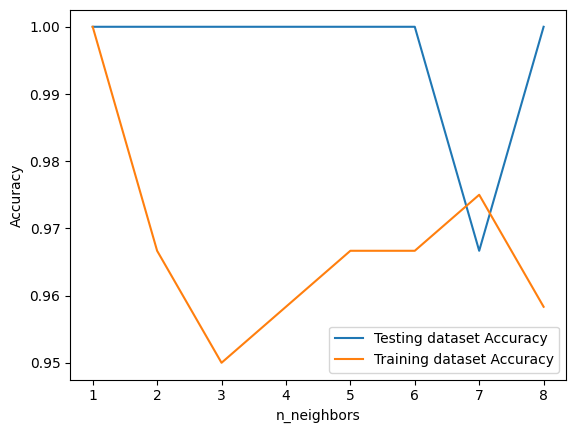

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

print(knn.predict(X_test))
print(knn.score(X_test, y_test))
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)

	train_accuracy[i] = knn.score(X_train, y_train)
	test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

6. Write a program to demonstrate the working of  EM algorithm.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


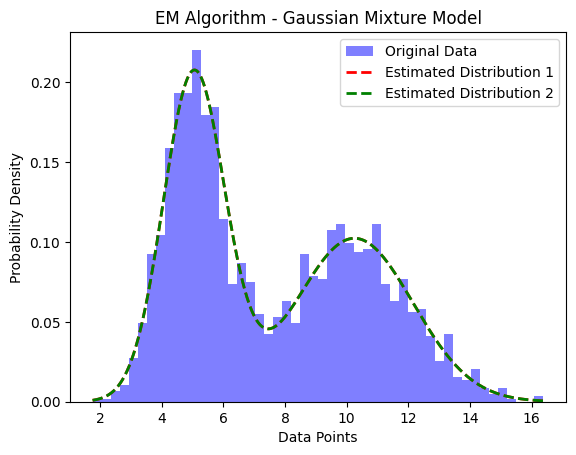

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

np.random.seed(42)

data1 = np.random.normal(loc=5, scale=1, size=1000)

data2 = np.random.normal(loc=10, scale=2, size=1000)

data = np.concatenate([data1, data2])

data = data.reshape(-1, 1)

gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(data)

plt.hist(data, bins=50, density=True, alpha=0.5, color='blue', label='Original Data')

x = np.linspace(data.min(), data.max(), 1000)
pdf1 = np.exp(gmm.score_samples(x.reshape(-1, 1)))
pdf2 = np.exp(gmm.score_samples(x.reshape(-1, 1)))
plt.plot(x, pdf1, color='red', linestyle='dashed', linewidth=2, label='Estimated Distribution 1')
plt.plot(x, pdf2, color='green', linestyle='dashed', linewidth=2, label='Estimated Distribution 2')

plt.title('EM Algorithm - Gaussian Mixture Model')
plt.xlabel('Data Points')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


7. Write a python program to implement Naive bayesian Classifier using any appropriate dataset.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



8. Write a program to implement K means Clustering, demonstrate the working by considering appropriate dataset.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


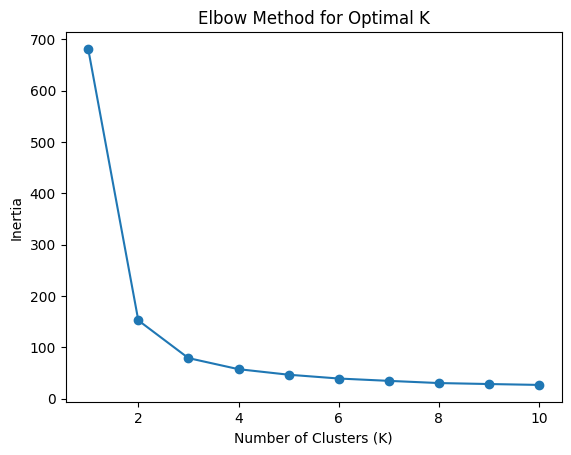

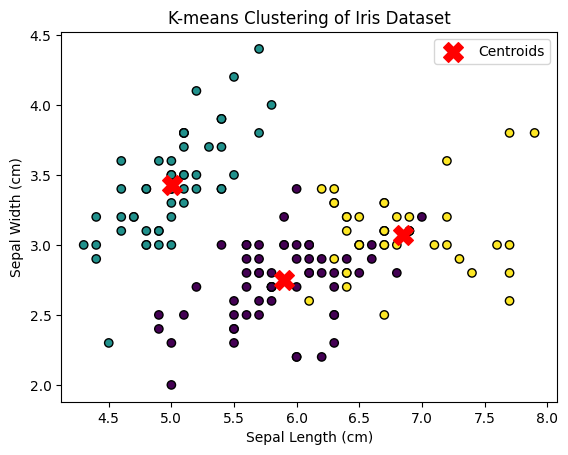

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data


inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)


kmeans.fit(X)


labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()


9. Write a program to demonstrate the working of Apriori alogirthm.

In [38]:
from itertools import combinations

def generate_C1(dataset):
    C1 = set()
    for transaction in dataset:
        for item in transaction:
            C1.add(frozenset([item]))
    return C1

def generate_L1(dataset, C1, min_support):
    item_count = {}
    for transaction in dataset:
        for item in transaction:
            item_count[frozenset([item])] = item_count.get(frozenset([item]), 0) + 1

    L1 = {itemset for itemset, count in item_count.items() if count >= min_support}
    return L1, item_count
def generate_Ck(Lk_minus_1, k):
    Ck = set()
    for itemset1 in Lk_minus_1:
        for itemset2 in Lk_minus_1:
            union_set = itemset1.union(itemset2)
            if len(union_set) == k:
                Ck.add(union_set)
    return Ck

def generate_Lk(dataset, Ck, min_support):
    item_count = {}
    for transaction in dataset:
        for itemset in Ck:
            if itemset.issubset(transaction):
                item_count[itemset] = item_count.get(itemset, 0) + 1

    Lk = {itemset for itemset, count in item_count.items() if count >= min_support}
    return Lk, item_count

def apriori(dataset, min_support):
    C1 = generate_C1(dataset)
    L1, item_count = generate_L1(dataset, C1, min_support)
    L = [L1]

    k = 2
    while len(L[k-2]) > 0:
        Ck = generate_Ck(L[k-2], k)
        Lk, item_count = generate_Lk(dataset, Ck, min_support)
        L.append(Lk)
        k += 1

    return L, item_count
dataset = [['bread', 'milk' , 'egg'],
           ['bread', 'diaper', 'beer', 'egg'],
           ['milk', 'diaper', 'egg' ,'beer', 'cola'],
           ['bread', 'milk', 'diaper', 'beer'],
           ['bread', 'milk', 'diaper', 'cola' , 'egg']]

min_support = 0.3

frequent_itemsets, item_count = apriori(dataset, min_support)

for k, Lk in enumerate(frequent_itemsets):
    print(f"Frequent {k+1}-itemsets:")
    print(Lk)
    print()


Frequent 1-itemsets:
{frozenset({'bread'}), frozenset({'cola'}), frozenset({'milk'}), frozenset({'diaper'}), frozenset({'egg'}), frozenset({'beer'})}

Frequent 2-itemsets:
{frozenset({'diaper', 'bread'}), frozenset({'beer', 'diaper'}), frozenset({'egg', 'milk'}), frozenset({'cola', 'diaper'}), frozenset({'cola', 'milk'}), frozenset({'diaper', 'egg'}), frozenset({'beer', 'milk'}), frozenset({'milk', 'bread'}), frozenset({'cola', 'bread'}), frozenset({'beer', 'egg'}), frozenset({'egg', 'bread'}), frozenset({'beer', 'bread'}), frozenset({'cola', 'egg'}), frozenset({'diaper', 'milk'}), frozenset({'cola', 'beer'})}

Frequent 3-itemsets:
{frozenset({'cola', 'diaper', 'egg'}), frozenset({'cola', 'diaper', 'bread'}), frozenset({'beer', 'diaper', 'milk'}), frozenset({'cola', 'beer', 'diaper'}), frozenset({'cola', 'beer', 'milk'}), frozenset({'beer', 'milk', 'bread'}), frozenset({'egg', 'milk', 'bread'}), frozenset({'diaper', 'milk', 'bread'}), frozenset({'egg', 'diaper', 'milk'}), frozenset({'c

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10. Write a program to implement PCA by using appropriate datasets for the computation.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


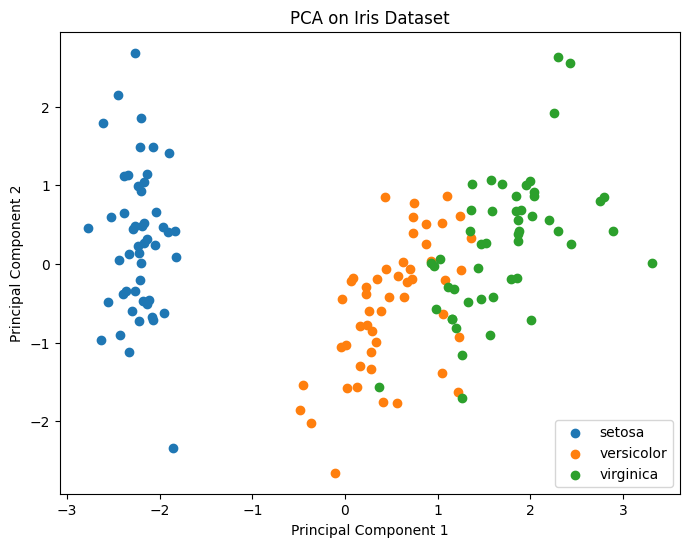

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data (mean=0 and variance=1)
X_std = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Visualize the results
plt.figure(figsize=(8, 6))

for i in range(len(iris.target_names)):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=iris.target_names[i])

plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
